In [9]:
#from evalVAE import *
from sklearn.cluster import KMeans
import umap

color = ['r', 'orange', 'yellow', 'greenyellow', 'green', 'aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']

def get_kmeans_labels(data, n_clusters):
    kmeans_labels = KMeans(init="k-means++", n_clusters=n_clusters, random_state=0, max_iter = 5).fit(x_umap).labels_
    return kmeans_labels

def umap_embedding(data, n_neighbors=50, save=None):

    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=0.1,
        n_components=2,
        metric='euclidean'
        )
    umaped = fit.fit_transform(data);
    print(umaped.shape)

    if save!=None:
        np.save('%s/umaped'%save, umaped )

    return umaped

def plot_cluster(data, labels, save=None):
    x = data[:,0]
    y = data[:,1]

    fig=plt.figure(figsize=(8,6))
 
    c = plt.scatter(x, y, c=labels, cmap='gist_rainbow', marker='.')
    plt.colorbar(boundaries=np.arange(max(labels)+2)-0.5).set_ticks(np.arange(max(labels)+1))

    plt.scatter(x, y, c=labels, cmap='gist_rainbow', marker='.')
    if save!=None:
        plt.savefig(save)
    
    
    plt.show()
    
def plot_project(data_2d, c_lenth=1, save=None):

    x = data_2d[:,0]
    y = data_2d[:,1]


    if type(c_lenth)==int:
        fig=plt.figure(figsize=(6,6))
        c = plt.scatter(x, y, marker='.', c='black', alpha=0.4)      
    else:
        fig=plt.figure(figsize=(8,6))
        #colors = (c_lenth-np.min(c_lenth))/(np.max(c_lenth)-np.min(c_lenth))
        c = plt.scatter(x, y, c=c_lenth, cmap='jet', marker='.')
        plt.colorbar(c)
    if save!=None:
        plt.savefig(save)
    plt.show()

In [5]:
save_path = '../5-Results/bengal/0812/train1/'
x_lat = np.load(save_path+'/x_lat.npy')
sylla_list = np.load(save_path+'/../pre/sylla_list.npy')

In [14]:
#x_umap = umap_embedding(x_lat)
x_umap = np.load(save_path+'/x_umap.npy')

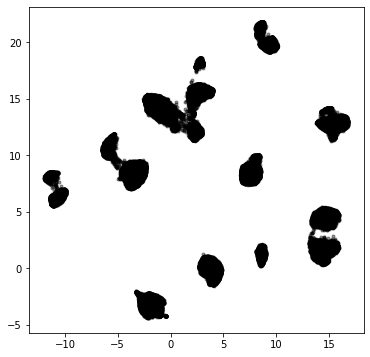

In [22]:
plot_project(x_umap, save=save_path+'/umap_projection')

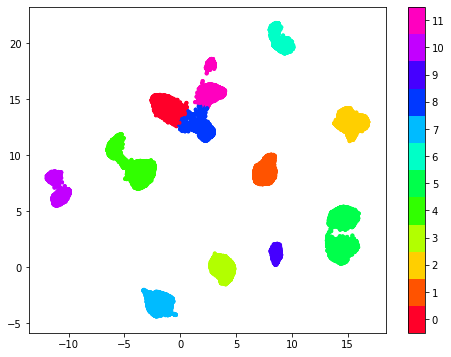

In [16]:
kmeans_labels = get_kmeans_labels(x_umap, 12)
plot_cluster(x_umap, kmeans_labels)

In [17]:
custom_labels = [0 if i==11 or i==8 or i==0 else i for i in kmeans_labels]
custom_labels = [8 if i==10 else i for i in custom_labels]

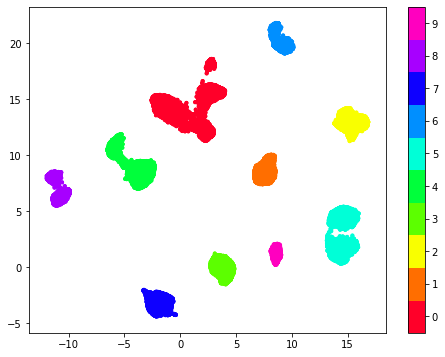

In [19]:
plot_cluster(x_umap, custom_labels, save_path+'umap_cluster')

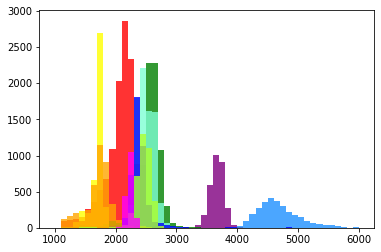

In [322]:
lenth = sylla_list[:,2]
g_list = [8,0,4,5,6,7,2,1,3,9]
for g in g_list:
    lenth_g = lenth[np.array(custom_labels)==g]
    plt.hist(lenth_g, color=color[g], bins=50, range=(1000,6000), alpha=0.8)
plt.show()

In [324]:
np.save(path+'/x_umap', x_umap)
np.save(path+'/custom_label', np.array(custom_labels))